In [5]:
#!pip install pgmpy

In [49]:
from graphviz import Digraph
import networkx as nx

In [237]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel 
from pgmpy.estimators import BayesianEstimator 
from pgmpy.estimators import K2Score

In [238]:
#file importing

data = pd.read_csv("../dist6_3horas_sig/alm_seq.csv")[['xmeas%02d_low' % x for x in [1,2,3,8,9,21]] + ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]]]
#data.head()

In [241]:
def graph(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    for k, row in enumerate(df.index):
        if any(df.iloc[k]) or any(df[row]):
            g.node(str(k),row, shape='oval', fontsize='10', width='0') 
    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            if df[col][i] == 1:
                g.edge(str(i), str(j), label='',style= edge_style)  
    return g 

In [242]:
#graph using moving mean of 5 samples and TE with k=l=4
path_graph = "../cenarios/cen_nova_versao/media5/k4_l4_h1_sel_corrs.csv"

df_te = pd.read_csv(path_graph, index_col=0)

In [245]:
def graph_nx(df):
    g = nx.DiGraph()
    labels={}
    for k, row in enumerate(df.index):
        if any(df.iloc[k]) or any(df[row]):
            g.add_node(k)
            labels[k] = row
    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            if df[col][i] == 1:
                g.add_edges_from([(i,j)])  
    return g, labels 

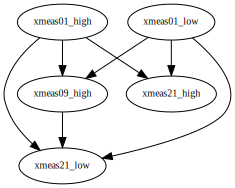

In [243]:
graph(df_te)

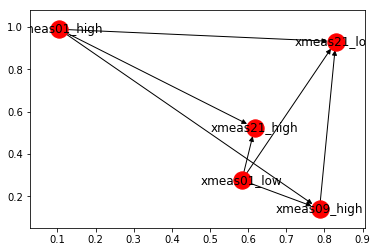

In [246]:
nx_teste = graph_nx(df_te)
pos=nx.layout.random_layout(nx_teste[0]) 
nx.draw_networkx_labels(nx_teste,pos,nx_teste[1])
nx.draw_networkx_nodes(nx_teste[0], pos)
nx.draw_networkx_edges(nx_teste[0], pos)

In [248]:
nx_teste[0].nodes

NodeView((0, 5, 6, 10, 11))

In [236]:
model = BayesianModel(nx_teste[0].edges) #modelo criado com o grafo da TE

In [ ]:
#k2



In [183]:
BayesianModel?